In [1]:
# pip install keras
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


Nhập thư viện

In [4]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D

# from tensorflow.keras.saving import pickle_utils


import pickle
import tensorflow as tf
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Hàm tiền xử lý ảnh

In [5]:
def preProcessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img / 255
    return img

**Hàm mô hình huấn luyện**

In [7]:
def myModel():
    noOfFilters = 60
    sizeOfFilter1 = (5, 5)
    sizeOfFilter2 = (3, 3)
    sizeOfPool = (2, 2)
    noOfNode = 500

# Mô hình
    model = Sequential()
    # Convolution + Relu
    model.add((Conv2D(noOfFilters, sizeOfFilter1, input_shape=(imageDimensions[0],
                                                               imageDimensions[1],
                                                               1),
                      activation='relu')))
    # Convolution + Relu
    model.add((Conv2D(noOfFilters, sizeOfFilter1, activation='relu')))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    # Convolution + Relu
    model.add((Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu')))
    # Convolution + Relu
    model.add((Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu')))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    # Dropout 50%
    model.add(Dropout(0.5))

    # Flatten
    model.add(Flatten())
    # Dense = Relu
    model.add(Dense(noOfNode, activation='relu'))
    # Dropout 50%
    model.add(Dropout(0.5))
    # Dense = ReLU
    model.add((noDenseOfClasses, activation:='softmax'))
    # Adam with learning rate 0.1%
    model.compile(Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Khai báo biến

In [8]:
# Tập dữ liệu cần train:
num = '3'
# Đường dẫn tới thư mục
path = 'drive/MyDrive/Master_Project/Machine_Learning_and_Applications/Handwritten_Numberics_Recognition/'
# Sử dụng dữ liệu H3 để Training
path_data = path + 'Data/H' + num
# Lưu thành file Training H3
path_model = path + 'Model/H' + num + '.p'
# Tỉ lệ tập kiểm thử so với tập gốc
testRatio = 0.2
# Tỉ lệ tập tối ưu so với tập gốc
valRatio = 0.2
# Tỉ lệ hình ảnh (32x32 + RGB)
imageDimensions = (32, 32, 3)
# Kích thước từng tập học con
batchSizeVal = 32
# Số lần lập
epochsVal = 100

# Ngưỡng mục tiêu
threshold = 0
count = trueImg = totalImg = 0

Đưa dữ liệu vào

In [9]:
count = 0
images = []
classNo = []
myList = os.listdir(path_data)
noOfClasses = len(myList)

print("Nhập dữ liệu các lớp...")
print("Nhập thành công lớp: ", end=" ")
for x in range(0, noOfClasses):
    myPicList = os.listdir(path_data + "/" + str(count))
    for y in myPicList:
        curImg = cv2.imread(path_data + "/" + str(count) + "/" + y)
        curImg = cv2.resize(curImg, (imageDimensions[0], imageDimensions[1]))
        images.append(curImg)
        classNo.append(count)
    print(count, end=" ")
    count += 1
print(" ")

print("Tổng số hình là: ", len(images))

images = np.array(images)
classNo = np.array(classNo)

Nhập dữ liệu các lớp...
Nhập thành công lớp:  0 1 2 3 4 5 6 7 8 9  
Tổng số hình là:  30010


Chia thành các tập [Huấn luyện, Kiểm tra, Tối ưu]

Số hình dùng để huấn luyện:  19206
Số hình dùng để thử nghiệm:  6002
Số hình dùng để tối ưu:  4802


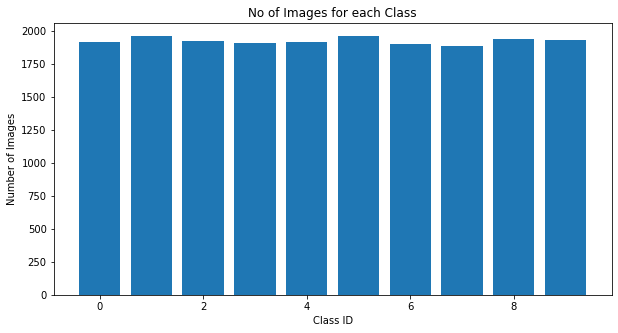

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=valRatio)
print("Số hình dùng để huấn luyện: ", X_train.shape[0])
print("Số hình dùng để thử nghiệm: ", X_test.shape[0])
print("Số hình dùng để tối ưu: ", X_validation.shape[0])

numOfSamples = []

for x in range(0, noOfClasses):
    numOfSamples.append(len(np.where(y_train == x)[0]))

plt.figure(figsize=(10, 5))
plt.bar(range(0, noOfClasses), numOfSamples)
plt.title("No of Images for each Class")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

Tiền xử lý ảnh

In [ ]:
X_train = np.array(list(map(preProcessing, X_train)))
X_test = np.array(list(map(preProcessing, X_test)))
X_validation = np.array(list(map(preProcessing, X_validation)))

# Chuyển về đúng số chiều
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)

dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

dataGen.fit(X_train)

# Chuyển về dạng one-hot vecter
y_train = to_categorical(y_train, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)

Mô hình huấn luyện

In [ ]:
model = myModel()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

Huấn luyện

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history = model.fit(dataGen.flow(X_train,
                                 y_train,
                                 batch_size=batchSizeVal),
                    epochs=epochsVal,
                    validation_data=(X_validation, y_validation),
                    shuffle=1,
                    callbacks=[callback])

Bảng mất mát

Text(0.5, 0, 'epoch')

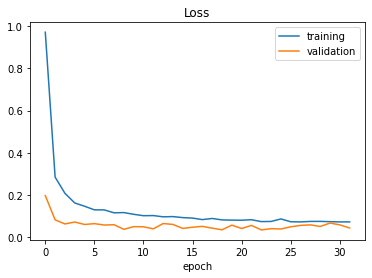

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Bảng chính xác

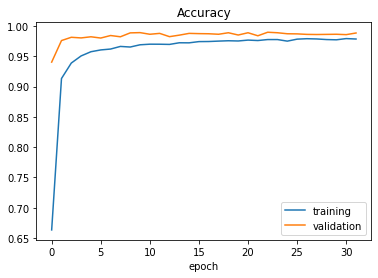

In [ ]:
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

Đánh giá với hàm kiểm tra

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Score = ', loss)
print('Test Accuracy = ', accuracy)

Test Score =  0.03807254880666733
Test Accuracy =  0.9901699423789978


Lưu mô hình đã huấn luyện

In [ ]:
pickle_out = open(path_model, "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

INFO:tensorflow:Assets written to: ram://2328ab2c-e715-40d0-b6c7-ab78b04b0668/assets


INFO:tensorflow:Assets written to: ram://2328ab2c-e715-40d0-b6c7-ab78b04b0668/assets


Duyệt qua tập H1 để kiểm tra

In [ ]:
path_data = path + 'Data/H1'
count = 0

pickle_in = open(path_model, "rb")
model = pickle.load(pickle_in)
myList = os.listdir(path_data)

for x in range(0, len(myList)):
    myPicList = os.listdir(path_data + "/" + str(count))
    print('Lớp', count)
    for y in myPicList:
        curImg = cv2.imread(path_data + "/" + str(count) + "/" + y)
        curImg = cv2.resize(curImg, (32, 32))
        image = cv2.resize(curImg, (320, 320))
        img = np.asarray(image)
        img = cv2.resize(img, (32, 32))
        img = preProcessing(img)
        img = img.reshape(1, 32, 32, 1)
        # Predict
        classIndex = model.predict(img)
        classIndex = np.argmax(classIndex, axis=1)
        predictions = model.predict(img)
        probVal = np.amax(predictions)
        print("Số " + str(classIndex) + ": " + str(round(round(probVal, 2) * 100)) + "%")
        totalImg += 1
        if (count == classIndex).any():
            trueImg += 1
    count += 1
    print('')
print('Tổng cộng có', totalImg, 'hình được kiểm tra')
print('Đúng', trueImg, 'hình. Chiếm', round((trueImg / totalImg * 100), 2),'%')

ModuleNotFoundError: No module named 'keras.saving.pickle_utils'